In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from macrohet import visualise
from tqdm.auto import tqdm
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Conversion factor
meters_per_pixel = 1.4949402023919043E-07  # Micrometers per pixel
micrometers_per_pixel = meters_per_pixel*1E6 # Micrometers per pixel

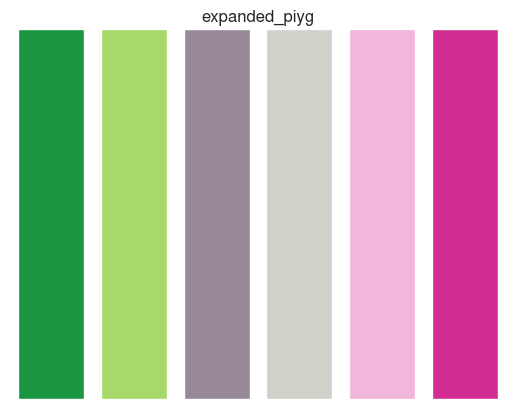

['#1a9641', '#a6d96a', '#978897', '#d1d1ca', '#f1b6da', '#d02c91']


In [3]:
# set display params
sns.set(style = 'white')
# Set the default font to Helvetica
mpl.rcParams['font.family'] = 'Nimbus Sans'
# import matplotlib as mpl
# mpl.rcdefaults()
# Get the color palette of the PiYG color map
expanded_piyg = visualise.color_palette('expanded_piyg').colors
sns.set_palette(expanded_piyg)
# Display the colors in the PiYG color map
visualise.show_colors('expanded_piyg')
print(expanded_piyg)

In [74]:
output_dir = '/mnt/SYNO/macrohet_syno/manuscript/results/june24'#/mnt/DATA/macrohet/results/preliminary_sc_measures/cumulative_sc_plots/thresholded_480/'#'/Users/dayn/data/macrohet_mac/temp_results/'#
os.makedirs(output_dir, exist_ok = True)

In [5]:
df = pd.read_pickle('/mnt/SYNO/macrohet_syno/manuscript/results/dt_df.pkl')
# Assuming your DataFrame is named 'df'
df['Strain/Compound'] = df['Compound']  # Create a new column and copy values from 'Compound'
# Replace values in 'NewColumn' where 'Strain' is 'RD1' with 'RD1'
df.loc[df['Strain'] == 'RD1', 'Strain/Compound'] = 'RD1'
df

,Time (hours),Mtb Area (µm),dMtb Area (µm),Mphi Area (µm),dMphi Area (µm),Infection Status,Initial Infection Status,Final Infection Status,x,y,...,dmtb_7,dt_8,dmtb_8,dt_9,dmtb_9,dt_10,dt_11,dmtb_10,dmtb_11,Strain/Compound
0,0.0,0.424621,-0.424621,459.082108,-92.746118,1.0,1.0,0.0,457.172943,8.791715,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RD1
1,1.0,0.000000,-0.424621,372.839393,-92.746118,0.0,1.0,0.0,459.138947,6.718642,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RD1
2,2.0,0.000000,-0.424621,423.168130,-92.746118,0.0,1.0,0.0,460.555237,10.785886,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RD1
3,3.0,0.335227,-0.424621,445.561289,-92.746118,1.0,1.0,0.0,455.878815,11.143067,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RD1
4,4.0,0.000000,-0.424621,487.040034,-92.746118,1.0,1.0,0.0,462.634186,14.050420,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RD1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1722130,74.5,1.117423,1.095075,752.584461,55.088959,1.0,1.0,1.0,227.093262,130.358139,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RD1
1722131,75.0,2.033710,1.095075,616.035357,55.088959,1.0,1.0,1.0,226.622925,130.532120,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RD1
1722132,75.5,1.430302,1.095075,579.182743,55.088959,1.0,1.0,1.0,225.366608,129.932709,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RD1
1722133,76.0,1.989013,1.095075,679.147414,55.088959,1.0,1.0,1.0,226.424683,128.489410,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RD1


# Calculating the MOI 

In [36]:
colour_palette = [expanded_piyg[0], expanded_piyg[1], expanded_piyg[-1], expanded_piyg[-2]]

In [48]:
df['Strain'].unique()

array(['RD1', 'WT', 'UNI'], dtype=object)

In [49]:
# Process data
results = []
for expt_ID in ['PS0000', 'ND0002', 'ND0003']:
    for compound in df['Strain/Compound'].unique():
        if compound == 'RD1':
            continue
        for concentration in df['Concentration'].unique():
            print(expt_ID, compound, concentration)
            subset_df = df[(df['Experiment ID'] == expt_ID) &
                           (df['Strain/Compound'] == compound) &
                           (df['Concentration'] == concentration) &
                            (df['Strain'] != 'UNI')]
            if len(subset_df) == 0:
                continue
            for acq_ID in subset_df['Acquisition ID'].unique():
                acq_subset_df = subset_df[subset_df['Acquisition ID'] == acq_ID]
                
                # Sort by time indices
                acq_subset_df = acq_subset_df.sort_values(by='Time (hours)')
                
                # Include only one instance of each ID (assuming 'ID' is the relevant column)
                acq_subset_df = acq_subset_df.drop_duplicates(subset=['ID'])
                
                # Count how many are infected vs total IDs
                total_ids = len(acq_subset_df)
                infected_ids = len(acq_subset_df[acq_subset_df['Initial Infection Status'] == True])
                
                moi = infected_ids / total_ids if total_ids > 0 else 0
                results.append((expt_ID, compound, concentration, acq_ID, moi))

# Convert results to a DataFrame
data = pd.DataFrame(results, columns=['Experiment ID', 'Strain/Compound', 'Concentration', 'Acquisition ID', 'MOI'])

# Plot each concentration on a separate graph
unique_concentrations = data['Concentration'].unique()



PS0000 CTRL EC0
PS0000 CTRL EC50
PS0000 CTRL EC99
PS0000 PZA EC0
PS0000 PZA EC50
PS0000 PZA EC99
PS0000 RIF EC0
PS0000 RIF EC50
PS0000 RIF EC99
PS0000 INH EC0
PS0000 INH EC50
PS0000 INH EC99
PS0000 BDQ EC0
PS0000 BDQ EC50
PS0000 BDQ EC99
ND0002 CTRL EC0
ND0002 CTRL EC50
ND0002 CTRL EC99
ND0002 PZA EC0
ND0002 PZA EC50
ND0002 PZA EC99
ND0002 RIF EC0
ND0002 RIF EC50
ND0002 RIF EC99
ND0002 INH EC0
ND0002 INH EC50
ND0002 INH EC99
ND0002 BDQ EC0
ND0002 BDQ EC50
ND0002 BDQ EC99
ND0003 CTRL EC0
ND0003 CTRL EC50
ND0003 CTRL EC99
ND0003 PZA EC0
ND0003 PZA EC50
ND0003 PZA EC99
ND0003 RIF EC0
ND0003 RIF EC50
ND0003 RIF EC99
ND0003 INH EC0
ND0003 INH EC50
ND0003 INH EC99
ND0003 BDQ EC0
ND0003 BDQ EC50
ND0003 BDQ EC99


/tmp/ipykernel_3655811/2865310288.py:3: UserWarning: The palette list has more values (4) than needed (1), which may not be intended.
  sns.relplot(


<Figure size 1200x800 with 0 Axes>

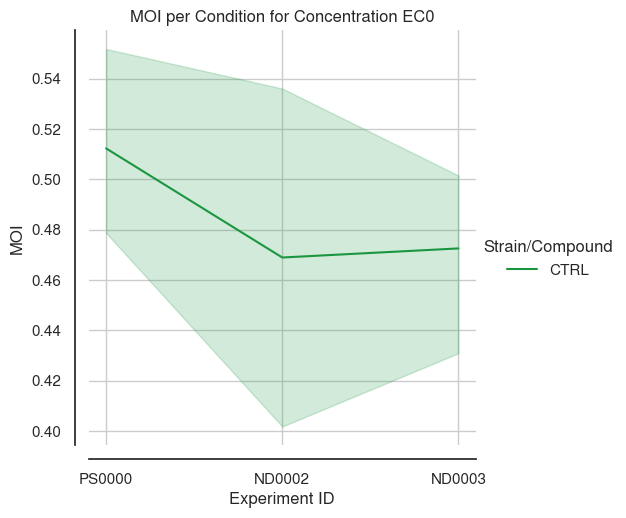

<Figure size 1200x800 with 0 Axes>

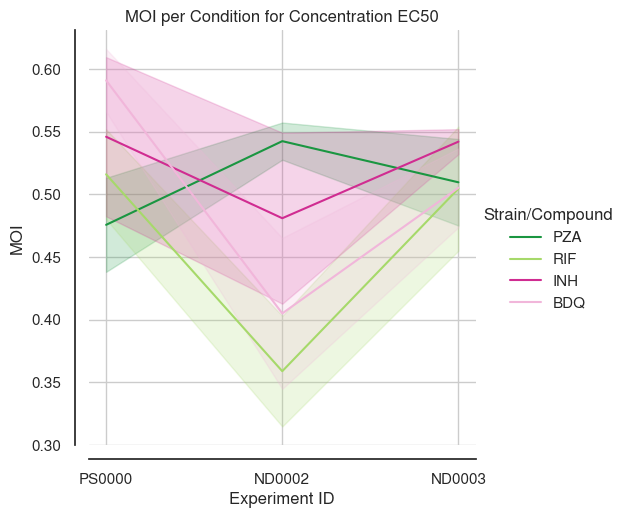

<Figure size 1200x800 with 0 Axes>

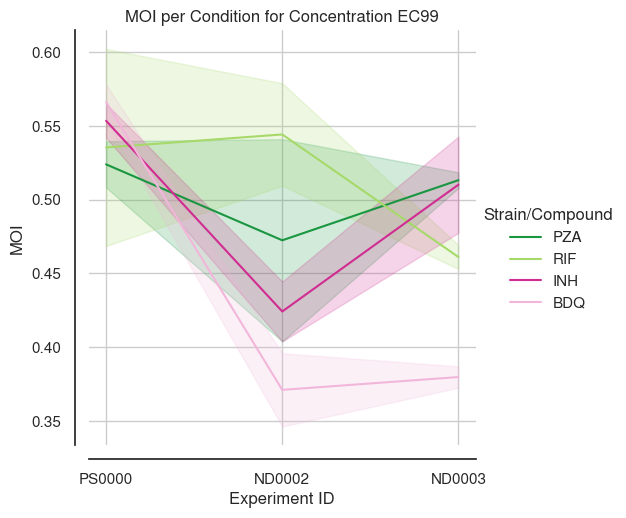

In [53]:

for concentration in unique_concentrations:
    plt.figure(figsize=(12, 8))
    sns.relplot(
        data=data[data['Concentration'] == concentration],
        x='Experiment ID', y='MOI',
        hue='Strain/Compound',
        kind='line',
        markers=True, dashes=False,
        palette=colour_palette
    )
    plt.title(f'MOI per Condition for Concentration {concentration}')
    plt.xlabel('Experiment ID')
    plt.ylabel('MOI')
    plt.grid(True)
    sns.despine(offset = 10)
    plt.savefig(os.path.join(output_dir, f'MOI_per_condition_{concentration}.pdf'), dpi = 314, bbox_inches = 'tight')
    plt.show()

In [ ]:
for concentration in unique_concentrations:
    plt.figure(figsize=(12, 8))
    sns.relplot(
        data=data[data['Concentration'] == concentration],
        x='Experiment ID', y='MOI',
        hue='Strain/Compound', style='Acquisition ID',
        kind='line',
        markers=True, dashes=False,
        palette=colour_palette
    )
    plt.title(f'MOI per Condition for Concentration {concentration}')
    plt.xlabel('Experiment ID')
    plt.ylabel('MOI')
    sns.despine(offset = 10)
    plt.grid(True)
    plt.savefig(os.path.join(output_dir, f'MOI_per_position_condition_{concentration}.pdf'), dpi = 314, bbox_inches = 'tight')


<Figure size 1200x800 with 0 Axes>

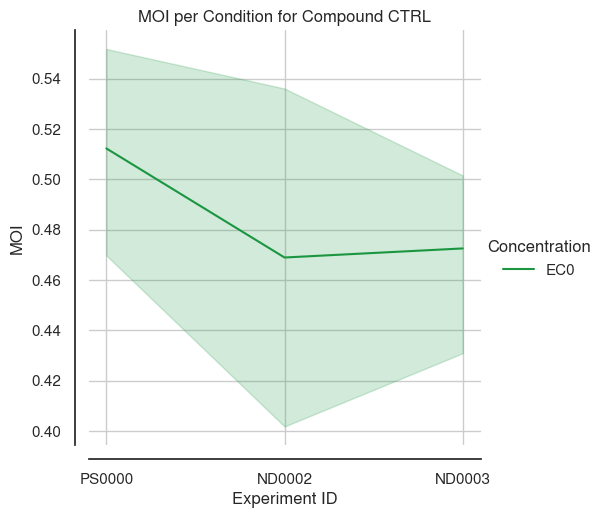

<Figure size 1200x800 with 0 Axes>

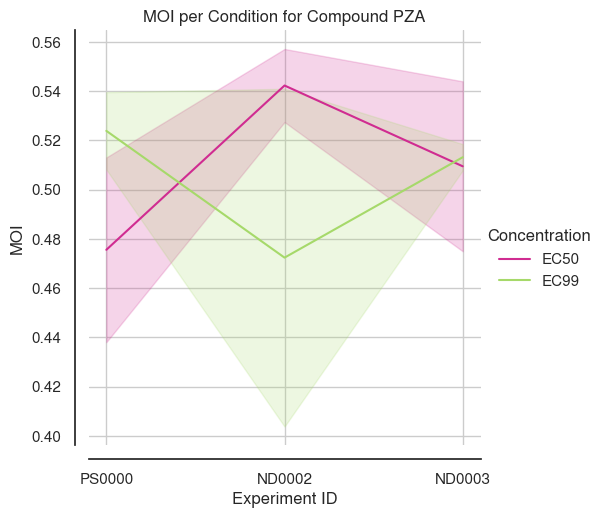

<Figure size 1200x800 with 0 Axes>

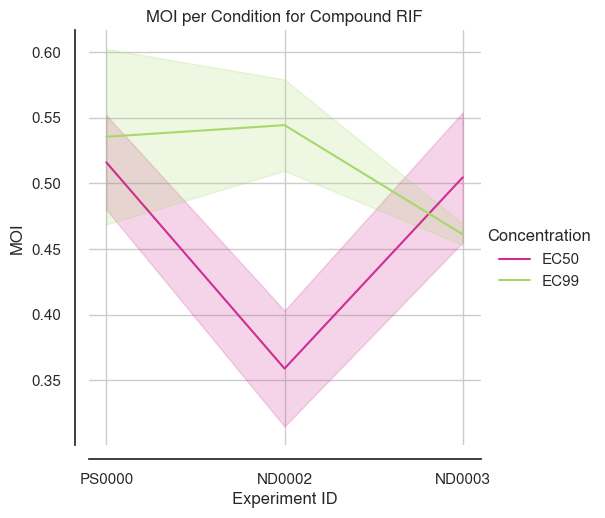

<Figure size 1200x800 with 0 Axes>

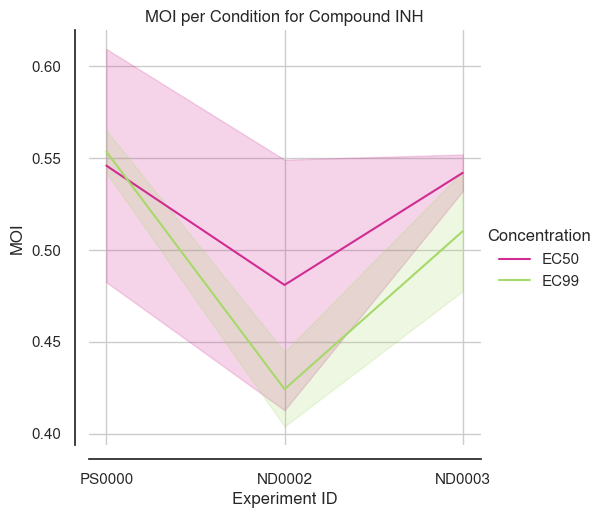

<Figure size 1200x800 with 0 Axes>

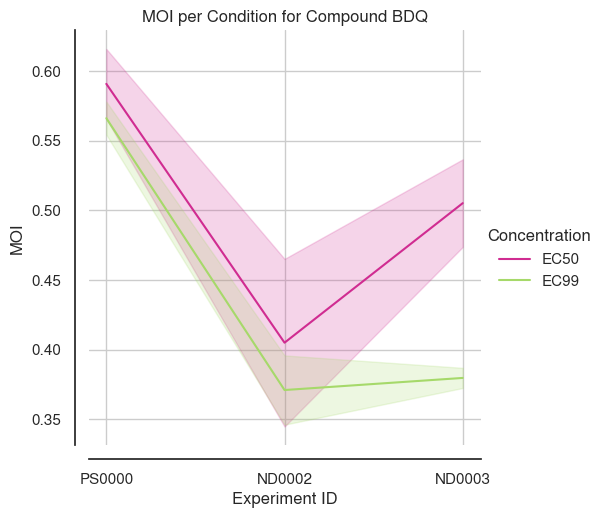

In [75]:

# Map concentrations to specified color palette indices
concentration_to_color_index = {
    'EC0': 0,
    'EC50': -1,
    'EC99': 1
}

# Create a color palette mapping
concentration_palette = {concentration: expanded_piyg[idx] for concentration, idx in concentration_to_color_index.items()}


# Plot each compound separately with all concentrations and acquisition IDs overlaid
unique_compounds = data['Strain/Compound'].unique()

for compound in unique_compounds:
    plt.figure(figsize=(12, 8))
    sns.relplot(
        data=data[data['Strain/Compound'] == compound],
        x='Experiment ID', y='MOI',
        hue='Concentration', #style='Acquisition ID',
        kind='line',
        markers=True, dashes=False,
        palette=concentration_palette
    ).set(title=f'MOI per Condition for Compound {compound}')
    plt.xlabel('Experiment ID')
    plt.ylabel('MOI')
    sns.despine(offset=10)
    plt.grid()
    plt.savefig(os.path.join(output_dir, f'MOI_per_compound_{compound}.pdf'), dpi=314, bbox_inches='tight')
    plt.show()

<Figure size 1200x800 with 0 Axes>

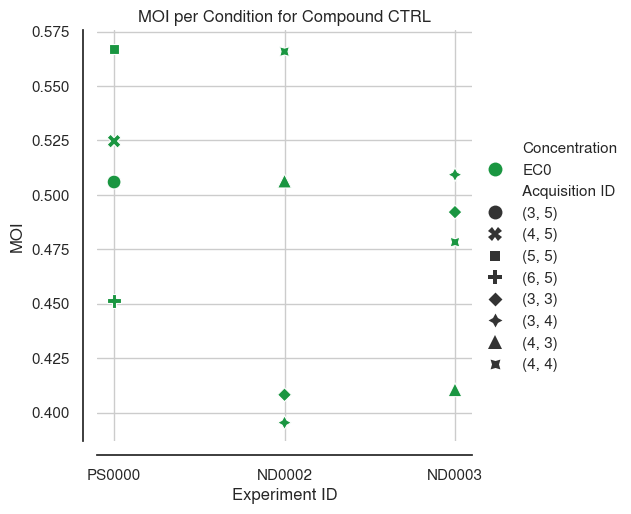

<Figure size 1200x800 with 0 Axes>

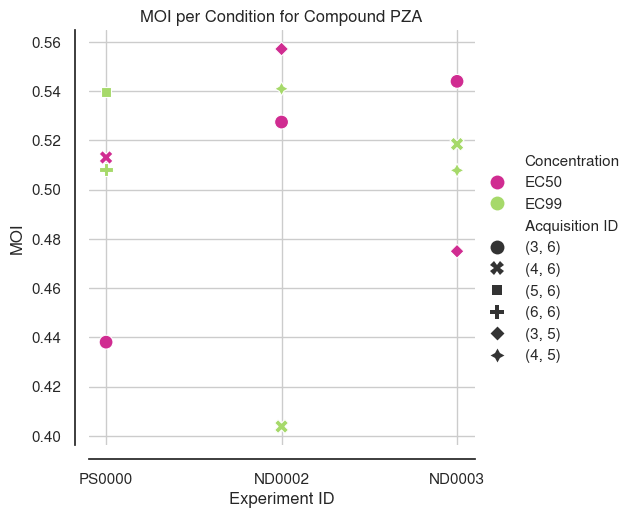

<Figure size 1200x800 with 0 Axes>

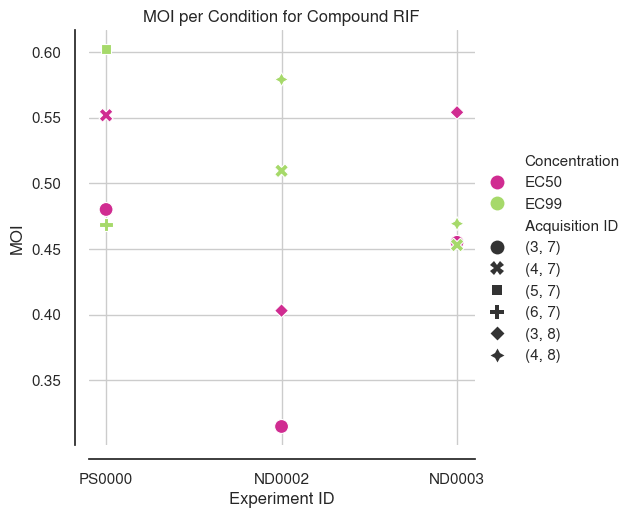

<Figure size 1200x800 with 0 Axes>

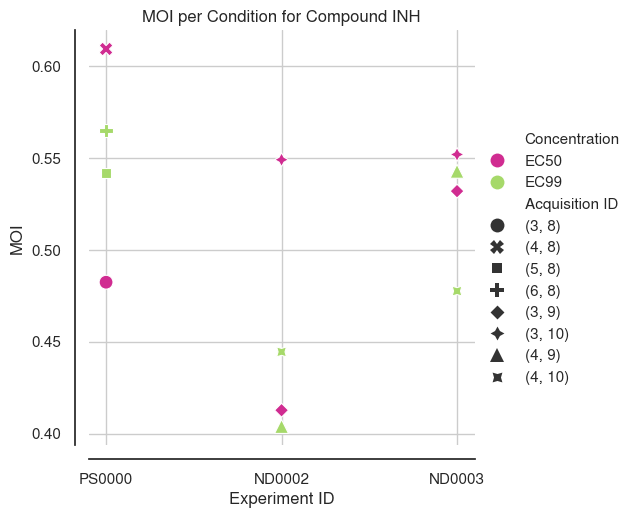

<Figure size 1200x800 with 0 Axes>

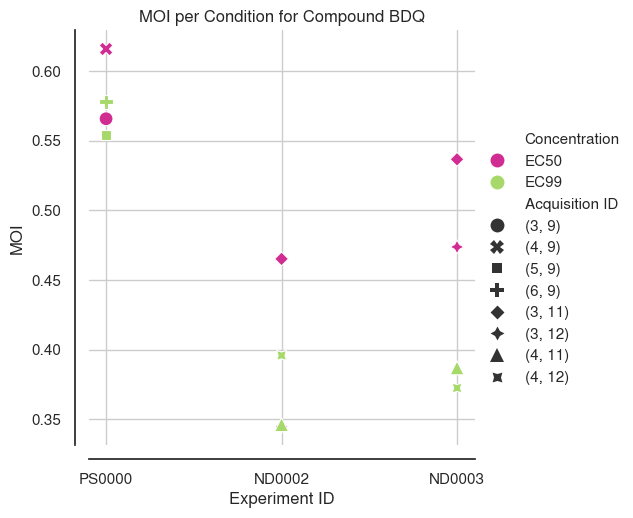

In [84]:

# Map concentrations to specified color palette indices
concentration_to_color_index = {
    'EC0': 0,
    'EC50': -1,
    'EC99': 1
}

# Create a color palette mapping
concentration_palette = {concentration: expanded_piyg[idx] for concentration, idx in concentration_to_color_index.items()}


# Plot each compound separately with all concentrations and acquisition IDs overlaid
unique_compounds = data['Strain/Compound'].unique()

for compound in unique_compounds:
    plt.figure(figsize=(12, 8))
    sns.relplot(
        data=data[data['Strain/Compound'] == compound],
        x='Experiment ID', y='MOI',
        hue='Concentration', style='Acquisition ID',
        kind='scatter', s = 100,
        markers=True, dashes=False,
        palette=concentration_palette
    ).set(title=f'MOI per Condition for Compound {compound}')
    plt.xlabel('Experiment ID')
    plt.ylabel('MOI')
    sns.despine(offset=10)
    plt.grid()
    plt.savefig(os.path.join(output_dir, f'MOI_per_position_compound_{compound}.pdf'), dpi=314, bbox_inches='tight')
    plt.show()

<Figure size 1200x800 with 0 Axes>

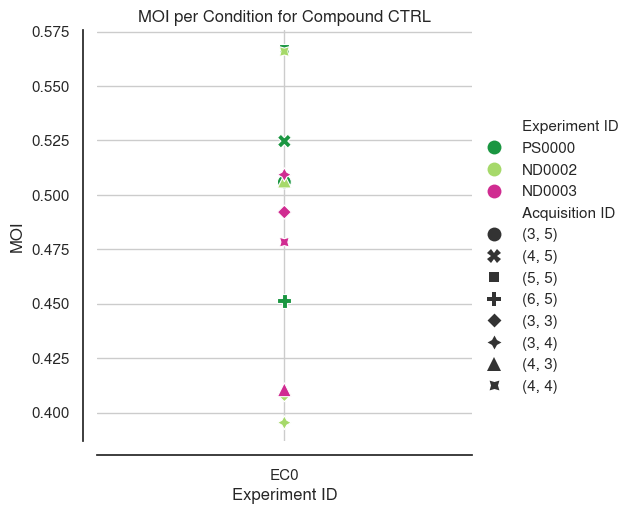

<Figure size 1200x800 with 0 Axes>

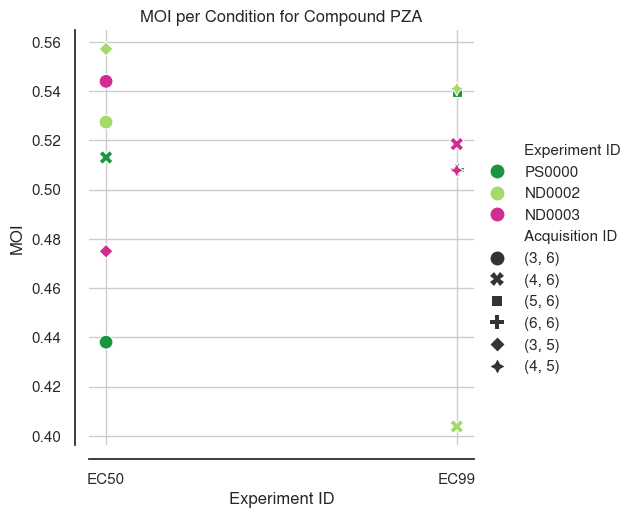

<Figure size 1200x800 with 0 Axes>

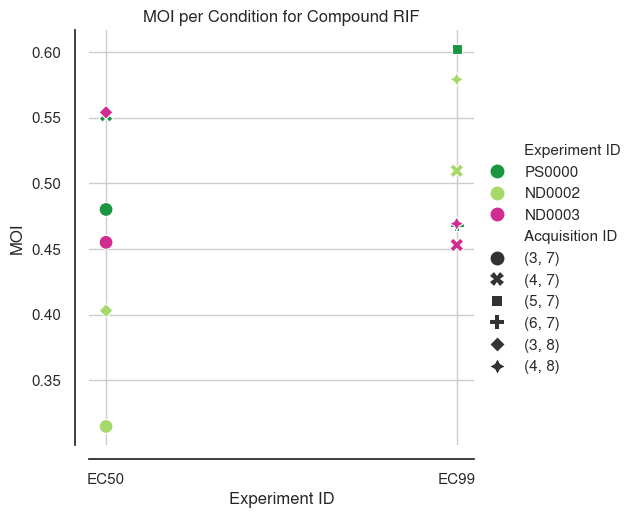

<Figure size 1200x800 with 0 Axes>

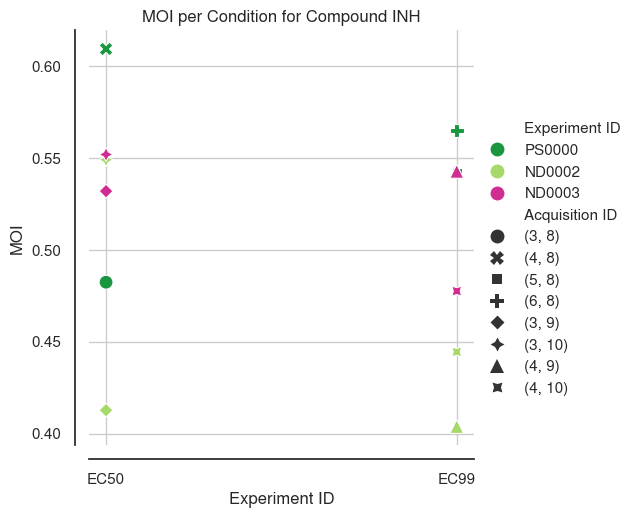

<Figure size 1200x800 with 0 Axes>

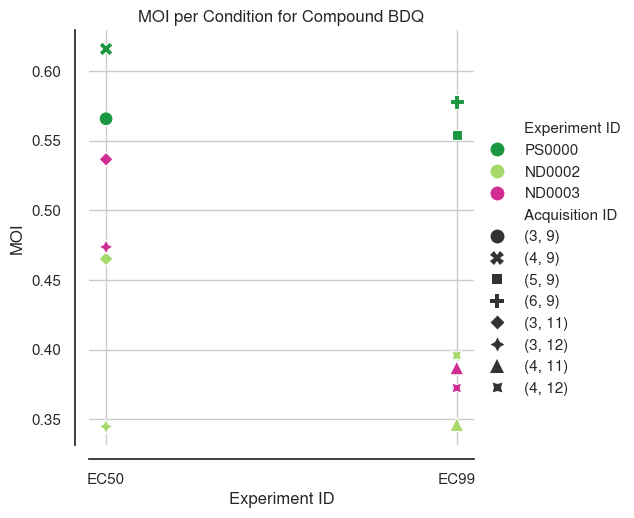

In [86]:

# Map concentrations to specified color palette indices
concentration_to_color_index = {
    'EC0': 0,
    'EC50': -1,
    'EC99': 1
}

# Map concentrations to specified color palette indices
expt_to_color_index = {
    'PS0000': 0,
    'ND0003': -1,
    'ND0002': 1
}

# Create a color palette mapping
concentration_palette = {concentration: expanded_piyg[idx] for concentration, idx in concentration_to_color_index.items()}
# Create a color palette mapping
expt_palette = {expt: expanded_piyg[idx] for expt, idx in expt_to_color_index.items()}


# Plot each compound separately with all concentrations and acquisition IDs overlaid
unique_compounds = data['Strain/Compound'].unique()

for compound in unique_compounds:
    plt.figure(figsize=(12, 8))
    sns.relplot(
        data=data[data['Strain/Compound'] == compound],
        hue='Experiment ID', y='MOI',
        x='Concentration', style='Acquisition ID',
        kind='scatter', s = 100,
        markers=True, dashes=False,
        palette=expt_palette
    ).set(title=f'MOI per Condition for Compound {compound}')
    plt.xlabel('Experiment ID')
    plt.ylabel('MOI')
    sns.despine(offset=10)
    plt.grid()
    plt.savefig(os.path.join(output_dir, f'MOI_per_expt_per_compound_{compound}.pdf'), dpi=314, bbox_inches='tight')
    plt.show()